# k-Nearest Neighbor (kNN) exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
#print ('X_train长度为',len(X_train))
#print (X_train[0].shape)
#print (X_train[0])
#print ("-----------------------------")
#print (X_train[0][0])
#print ('X_train[0]长度为',len(X_train[0]))
#print ('X_train[0][0]长度为',len(X_train[0][0]))
'''
2017-12-29
@author: mckee
样本格式为：每一行代表一张图片，每张图片均为彩色图像，尺寸为32x32x3.
'''
#print (y_train)  #查看训练集标签，第3块可以对照这里print出来的内容
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)#50000张，10类，1类5000张，且顺序random
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


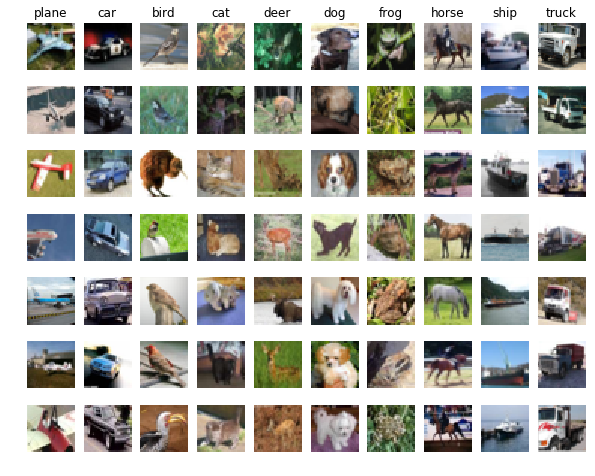

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y) #flatnonzero:找到值==y的元素的位置(index)
    #print (y)
    #print (idxs)
    #print (len(idxs))
    idxs = np.random.choice(idxs, samples_per_class, replace=False) #choice:从参数一的列表中选出参数二个样本，且采样中不允许有重复值
    #print ('第%d类的7个样本元素的index为' %(y+1))
    for i, idx in enumerate(idxs):
        #print (i,idx)
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx) #行，列，第几个
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [3]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training)) 
X_train = X_train[mask]
#print (X_train)
print (X_train.shape)
y_train = y_train[mask]
print (y_train)
print (y_train.shape)
num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

(5000, 32, 32, 3)
[6 9 9 ..., 5 4 6]
(5000,)


In [4]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print (X_train)

(5000, 3072) (500, 3072)
[[  59.   62.   63. ...,  123.   92.   72.]
 [ 154.  177.  187. ...,  143.  133.  144.]
 [ 255.  255.  255. ...,   80.   86.   84.]
 ..., 
 [ 167.  163.  145. ...,   42.   78.   84.]
 [ 154.  152.  125. ...,  194.  247.  114.]
 [  45.   32.   21. ...,  156.  142.  100.]]


In [15]:
#ABORTED!
'''
2017-12-29 Test
@author: mckee
purpose: complete the KNN classifier
'''
from math import *
dists = np.zeros((X_test.shape[0],X_train.shape[0]))

#print (X_test)
for i in range(X_test.shape[0]):
    for j in range(X_train.shape[0]):
        #print (X_test[i,:])
        #print (X_train[j,:].shape)
        temp = np.power((X_test[i,:]- X_train[j,:]),2)
        dists[i,j] = sum(temp)
print (dists)
'''
Problem:too slow (two loops are costly)
'''

KeyboardInterrupt: 

In [32]:
#TEST! DO NOT EXECUTE!
'''
2017-12-30 Test
@author: mckee
purpose: improve the algorithom above
description: compute the distance matrix (500x5000)
'''
#del dists
from math import *
#dists = np.zeros((X_test.shape[0],X_train.shape[0]))
temp = []

for i in range(X_test.shape[0]):
    X_te_row = np.tile(X_test[i],(X_train.shape[0],1))#将参数一扩充成参数二的维度
    #s = sqrt(np.sum((X_te_row - X_train)**2))
    s = ((X_te_row - X_train)**2) # 5000x3072
    s = s.sum(axis = 1) #按行求和
    s = np.sqrt(s)
    #print (s)
    #s = np.mat(s) #将矢量变成矩阵 mat--matrix
    #print (s.shape)
    temp.append(s)
dists = np.mat(temp) #将list变为matrix
print (dists.shape)
print (dists)


[autoreload of cs231n.classifiers.k_nearest_neighbor failed: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "cs231n/classifiers/k_nearest_neighbor.py", line 101
SyntaxError: Non-ASCII character '\xe6' in file cs231n/classifiers/k_nearest_neighbor.py on line 101, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details
]


(500, 5000)
[[ 3803.92350081  4210.59603857  5504.0544147  ...,  4007.64756434
   4203.28086142  4354.20256764]
 [ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
   4694.09767687  7768.33347636]
 [ 5224.83913628  4250.64289255  3773.94581307 ...,  3766.81549853
   4464.99921613  6353.57190878]
 ..., 
 [ 5366.93534524  5062.8772452   6361.85774755 ...,  5126.56824786
   4537.30613911  5920.94156364]
 [ 3671.92919322  3858.60765044  4846.88157479 ...,  3521.04515734
   3182.3673578   4448.65305458]
 [ 6960.92443573  6083.71366848  6338.13442584 ...,  6083.55504619
   4128.24744898  8041.05223214]]


In [5]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps: 

1. First we must compute the distances between all test examples and all train examples. 
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

First, open `cs231n/classifiers/k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [7]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
#dists = classifier.compute_distances_two_loops(X_test)
'''
2018-1-2 Change
@author: mckee
content: change the two_loops function to one_loop function
'''
dists = classifier.compute_distances_one_loop(X_test)
print (dists.shape)
print (dists)
print (type(dists))

(500, 5000)
[[ 3803.92350081  4210.59603857  5504.0544147  ...,  4007.64756434
   4203.28086142  4354.20256764]
 [ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
   4694.09767687  7768.33347636]
 [ 5224.83913628  4250.64289255  3773.94581307 ...,  3766.81549853
   4464.99921613  6353.57190878]
 ..., 
 [ 5366.93534524  5062.8772452   6361.85774755 ...,  5126.56824786
   4537.30613911  5920.94156364]
 [ 3671.92919322  3858.60765044  4846.88157479 ...,  3521.04515734
   3182.3673578   4448.65305458]
 [ 6960.92443573  6083.71366848  6338.13442584 ...,  6083.55504619
   4128.24744898  8041.05223214]]
<class 'numpy.matrixlib.defmatrix.matrix'>


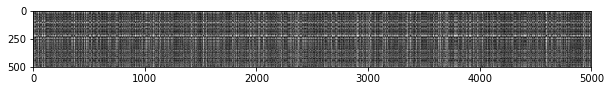

In [8]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

In [29]:
#ERROR! ABORTED!
'''
2018-1-2 Test
@author: mckee
content: compute the y_pre
'''
k = 5
num_test = dists.shape[0]
#print (num_test)
y_pred = np.zeros(num_test)
#print (y_pred.shape)
#sorted_dists = np.sort(dists)
#print (sorted_dists)
index = dists.argsort()
#print (index)
print (index.shape)
#print ('y_train:',y_train)
#print (len(y_train))
closest_y = []
for i in range(num_test):
    t = index[i,:]
    print (t)
    k_label = []
    for j in range(k):
        indice = np.where(t == j)  
    #print (indice[1])
        add_value = y_train[indice[1]]
        k_label.append(add_value)
    #closest_y.append(add_value)
    #print (k_label)
    a = list(k_label.count(q) for q in k_label)
    add = k_label[a.index(max(a))]
    #print (add)
    #print ('--------------------')
    closest_y.append(add[0])
y_pred = np.array(closest_y)
#print (y_pred)


(500, 5000)
[[ 420 3684 4224 ..., 4375 2744 4601]]
[[2192 4848 2166 ..., 4400 4688 1387]]
[[4469  909 3904 ..., 4921 3355 3837]]
[[ 252 4453 4270 ..., 4688 4921 1387]]
[[1881 3949 3797 ..., 4271 2744 4601]]
[[2654  347 1983 ...,  790 4601 2744]]
[[4033  831   22 ..., 1342 2744 4601]]
[[ 910 4055 1838 ..., 4645 2744 4601]]
[[4808 1686 1283 ..., 4813 4940 1387]]
[[2096 4320  126 ..., 2814 3035 4688]]
[[ 303  456 1759 ..., 1387 4940 3286]]
[[ 139  722 2905 ..., 4921 3355 3837]]
[[2745 3540 4124 ..., 4271 3205 4601]]
[[ 825 4279  920 ..., 1342 2744 1527]]
[[ 271 4066 2749 ..., 4645 2744 4601]]
[[4183 4453 1832 ..., 4273 1342 4564]]
[[4153 1160 2550 ...,  977 3737 4564]]
[[  80 4864 4045 ..., 4940 3286  735]]
[[3059 2192 2670 ..., 4590 3355 3837]]
[[1881 4139 4604 ..., 4601 4418 1527]]
[[2693 1440 1038 ...,  735 4601  504]]
[[1522 3382 3842 ..., 1843 2439 4940]]
[[4282 2277 2660 ..., 4645 2744 4601]]
[[ 313 2196 2069 ..., 4645 4601  735]]
[[2764 2859  982 ..., 4656 1387 4940]]
[[ 420 4224 3

In [123]:
# @TEST! DO NOT EXECUTE!
'''
2018-1-3
@author: mckee
content: compute and revise the y_pred
'''
k = 5
#print (dists)
y_pred = np.zeros(500)
index = dists.argsort()   #从小到大排序
print (index.shape)

for i in range(500):
    closest_y = []
    buf = np.asarray(index[i,:])[0]   #将matrix:[[]]变成array:[]
    #print (buf[:k])
    closest_y = y_train[buf[:k]]
    #print (closest_y)
    count = np.bincount(closest_y)
    y_pred[i] = np.argmax(count) #找到最大值出现的位置，这个位置也即label
print (y_pred)

(500, 5000)
[ 4.  8.  8.  8.  4.  6.  6.  2.  2.  8.  0.  8.  4.  6.  4.  2.  5.  4.
  8.  2.  2.  0.  0.  2.  2.  4.  2.  4.  2.  2.  0.  2.  4.  3.  8.  1.
  2.  0.  2.  0.  8.  6.  0.  4.  0.  0.  5.  0.  4.  2.  8.  8.  4.  2.
  8.  8.  5.  6.  0.  0.  2.  6.  6.  0.  4.  2.  8.  0.  3.  9.  2.  6.
  8.  8.  0.  2.  2.  3.  6.  8.  8.  3.  6.  0.  2.  8.  2.  8.  8.  8.
  0.  2.  8.  6.  4.  2.  4.  0.  0.  4.  4.  4.  3.  3.  4.  1.  6.  6.
  5.  5.  2.  0.  6.  0.  4.  4.  2.  4.  4.  4.  8.  4.  0.  2.  8.  4.
  0.  2.  4.  2.  2.  1.  8.  6.  0.  2.  9.  0.  2.  8.  2.  0.  6.  2.
  8.  2.  6.  2.  3.  5.  0.  3.  2.  0.  4.  4.  0.  8.  5.  8.  0.  4.
  2.  4.  0.  0.  8.  2.  5.  0.  8.  7.  2.  8.  4.  4.  0.  4.  6.  0.
  8.  4.  2.  0.  0.  0.  6.  6.  0.  8.  2.  4.  2.  3.  4.  2.  8.  0.
  3.  2.  2.  0.  8.  2.  8.  4.  0.  2.  2.  8.  4.  8.  0.  4.  8.  2.
  0.  0.  0.  2.  4.  4.  8.  0.  2.  7.  4.  2.  0.  4.  3.  1.  2.  4.
  0.  0.  2.  9.  0.  0.  0.  8.  8.  0

**Inline Question #1:** Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

**Your Answer**: *fill this in.*



In [8]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)
print (dists.shape)
print (type(dists))
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
#print (y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

(500, 5000)
<class 'numpy.matrixlib.defmatrix.matrix'>
Got 137 / 500 correct => accuracy: 0.274000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

In [26]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

ValueError: object too deep for desired array

You should expect to see a slightly better performance than with `k = 1`.

In [12]:
# @ABORTED!
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [23]:
#TEST！ DO NOT EXECUTE！
'''
2018-1-3
@author: mckee
content: compute L2 matrix without loops
comment: 666
'''
print (X_test.shape)
print (X_train.shape)
a = -2*np.dot(X_test,X_train.T)
print (a.shape)
b = np.sum(np.square(X_train),axis=1)
print (b.shape)
c = np.transpose([np.sum(np.square(X_test), axis = 1)])
print (c.shape)
dists = np.sqrt(a+b+c)
print (dists)

#dists = sqrt((c-b)**2 )
#dists = np.sqrt(-2*np.dot(X, self.X_train.T) + np.sum(np.square(self.X_train), axis = 1) + np.transpose([np.sum(np.square(X), axis = 1)]))

(500, 3072)
(5000, 3072)
(500, 5000)
(5000,)
(500, 1)
[[ 3803.92350081  4210.59603857  5504.0544147  ...,  4007.64756434
   4203.28086142  4354.20256764]
 [ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
   4694.09767687  7768.33347636]
 [ 5224.83913628  4250.64289255  3773.94581307 ...,  3766.81549853
   4464.99921613  6353.57190878]
 ..., 
 [ 5366.93534524  5062.8772452   6361.85774755 ...,  5126.56824786
   4537.30613911  5920.94156364]
 [ 3671.92919322  3858.60765044  4846.88157479 ...,  3521.04515734
   3182.3673578   4448.65305458]
 [ 6960.92443573  6083.71366848  6338.13442584 ...,  6083.55504619
   4128.24744898  8041.05223214]]
0.0


In [12]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [14]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

#two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
#print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

One loop version took 31.676683 seconds
No loop version took 0.408643 seconds


### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [5]:
from cs231n.classifiers import KNearestNeighbor
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
y_train = y_train.reshape(-1,1)
X_train_folds = np.array_split(X_train,num_folds) #return list
y_train_folds = np.array_split(y_train,num_folds)

print ('第一份X_train的维度为:',X_train_folds[0].shape)
print ('第一份y_train的维度为:',y_train_folds[0].shape)
print (type(X_train_folds))
print (type(y_train_folds))
#print (X_train_folds)
print ('###########################')
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}
for i in k_choices:
    k_to_accuracies[i] = []

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
for i in range(num_folds):
    classifier = KNearestNeighbor()
    X_val_train = np.vstack(X_train_folds[0:i] + X_train_folds[i+1:])#vstack针对列表;row_stack、column_stack针对数组
    #print (X_val_train)
    #print (X_val_train.shape)          #X_train : 4000x3072
    #print ("---------------")
    y_val_train = np.vstack(y_train_folds[0:i] + y_train_folds[i+1:])
    #print (y_val_train)
    #print (y_val_train.shape)
    y_val_train = y_val_train[:,0] #取每一行的第0个元素
    #print (y_val_train)
    #print (y_val_train.shape)           #y_train : (4000,)
    classifier.train(X_val_train, y_val_train)
    #print (classifier.X_train.shape)
    #print ('66666666666666666')
    for j in k_choices:  #X_train_folds[i]作为验证集，相当于X_test,验证精度
        #print (X_train_folds[i])
        #y_val_pred = classifier.predict(X_train_folds[i],k = j)
        distance = classifier.compute_distances_no_loops(X_train_folds[i])
        distance = np.mat(distance)
        #print (distance.shape)
        #print (type(distance))
        y_val_pred = classifier.predict_labels(distance, k=j)
        #print (y_val_pred)
        num_correct = np.sum(y_val_pred == y_train_folds[i][:,0])
        #print (num_correct) 
        accuracy = float(num_correct) / len(y_val_pred)
        #print (accuracy)
        k_to_accuracies[j] = k_to_accuracies[j] + [accuracy] #字典元素扩充
        #pass
    #print ('-----------------')
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print (k_to_accuracies)
# Print out the computed accuracies

for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))
       

第一份X_train的维度为: (1000, 3072)
第一份y_train的维度为: (1000, 1)
<type 'list'>
<type 'list'>
###########################
{1: [0.263, 0.257, 0.264, 0.278, 0.266], 3: [0.239, 0.249, 0.24, 0.266, 0.254], 100: [0.256, 0.27, 0.263, 0.256, 0.263], 5: [0.248, 0.266, 0.28, 0.292, 0.28], 8: [0.262, 0.282, 0.273, 0.29, 0.273], 10: [0.265, 0.296, 0.276, 0.284, 0.28], 12: [0.26, 0.295, 0.279, 0.283, 0.28], 15: [0.252, 0.289, 0.278, 0.282, 0.274], 50: [0.271, 0.288, 0.278, 0.269, 0.266], 20: [0.27, 0.279, 0.279, 0.282, 0.285]}
k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 

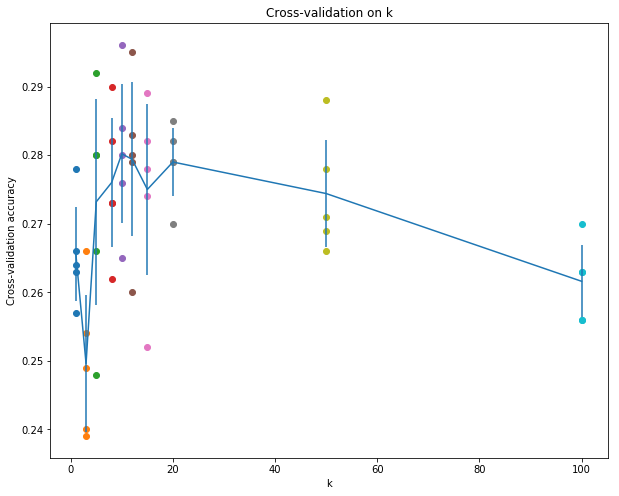

In [6]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [13]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
from cs231n.classifiers import KNearestNeighbor
best_k = 10

kNN = KNearestNeighbor()
kNN.train(X_train, y_train)
#print (X_train.shape)
#print (X_test.shape)
dist_no_loop = kNN.compute_distances_no_loops(X_test)
dist = np.mat(dist_no_loop)
y_test_pred = kNN.predict_labels(dist, k=best_k)
#y_test_pred = classifier.predict(X_test, k=20)

# Compute and display the accuracy

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print (num_correct)
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


141
Got 141 / 500 correct => accuracy: 0.282000
